In [2]:
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import plotly.express as px
import numpy as np
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
import scipy
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D
from tensorflow.keras.layers import AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19680\821654451.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19680\821654451.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())


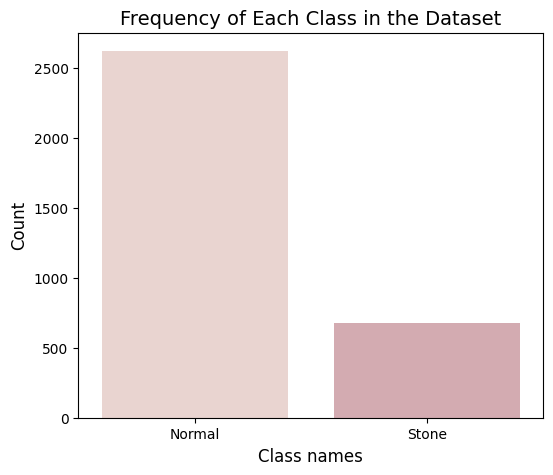

In [3]:
class_names = ['Normal', 'Stone']

normal = len(os.listdir('./dataset/train/normal'))
stone = len(os.listdir('./dataset/train/stone'))

images = [normal, stone]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()
px.pie(names= class_names, values= images, color_discrete_sequence=px.colors.sequential.BuGn)

In [4]:
# Fungsi untuk memuat gambar dari folder dan mengonversi ke array numpy
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = image.load_img(path, target_size=(128, 128))  # Ubah ukuran gambar sesuai kebutuhan
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(folder.split('/')[-1])  # Ambil nama kelas dari nama folder

    return np.array(images), np.array(labels)

# Load dataset dari folder
normal_folder = "./dataset/train/Normal"
stone_folder = "./dataset/train/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_train = X / 255.0
# Ubah label ke format one-hot encoding
y_train = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 2619, 1: 678})


In [5]:
X_train.shape, y_train.shape

((3297, 128, 128, 3), (3297, 2))

In [6]:
# Load dataset dari folder
normal_folder = "./dataset/val/Normal"
stone_folder = "./dataset/val/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_val = X / 255.0
# Ubah label ke format one-hot encoding
y_val = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 327, 1: 84})


In [7]:
X_val.shape, y_val.shape

((411, 128, 128, 3), (411, 2))

In [8]:
# Load dataset dari folder
normal_folder = "./dataset/test/Normal"
stone_folder = "./dataset/test/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0,1]
X_test = X / 255.0
# Ubah label ke format one-hot encoding
y_test = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 328, 1: 86})


In [9]:
X_test.shape, y_test.shape

((414, 128, 128, 3), (414, 2))

In [10]:
# Set the CNN model 
input_shape = (128, 128, 3)
num_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

##############################
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
##############################
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 average_pooling2d (Average  (None, 64, 64, 32)        0         
 Pooling2D)                                                      
                                                      

In [11]:
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# model = Model(pre_trained_model.input, x)
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy',
                                            keras.metrics.Precision(name='precision'),
                                            keras.metrics.Recall(name='recall'),
                                            tf.keras.metrics.SpecificityAtSensitivity(0.0),
                                            tf.keras.metrics.SensitivityAtSpecificity(0.0)
                                          ])

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [13]:
batch_size = 32

epochs = 100

history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              validation_steps=(X_val.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/100


103/103 [==============================] - 56s 504ms/step - loss: 0.5961 - accuracy: 0.7154 - precision: 0.7154 - recall: 0.7154 - specificity_at_sensitivity: 1.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 4.2648 - val_accuracy: 0.1484 - val_precision: 0.1484 - val_recall: 0.1484 - val_specificity_at_sensitivity: 1.0000 - val_sensitivity_at_specificity: 1.0000 - lr: 1.0000e-04
Epoch 2/100
103/103 [==============================] - 52s 505ms/step - loss: 0.2932 - accuracy: 0.8778 - precision: 0.8778 - recall: 0.8778 - specificity_at_sensitivity: 1.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 11.9861 - val_accuracy: 0.1484 - val_precision: 0.1484 - val_recall: 0.1484 - val_specificity_at_sensitivity: 1.0000 - val_sensitivity_at_specificity: 1.0000 - lr: 1.0000e-04
Epoch 3/100
103/103 [==============================] - 51s 493ms/step - loss: 0.1716 - accuracy: 0.9415 - precision: 0.9415 - recall: 0.9415 - specificity_at_sensitivity: 1.0000 - sensitivity_at_

In [14]:
from sklearn.metrics import f1_score, classification_report

# Prediksi menggunakan model
y_pred_probs = model.predict(X_test)  # Gantilah x_test dengan data uji Anda
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi

# Konversi hasil prediksi menjadi bentuk yang sesuai
y_true = np.argmax(y_test, axis=1)  # Gantilah y_test dengan label ground truth

# Hitung F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' untuk klasifikasi multiclass

print("F1 Scores:", f1)

# Print laporan klasifikasi
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

13/13 [==============================] - 2s 129ms/step
F1 Scores: 1.0
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       328
           1     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414



In [15]:
import math 

los, acc, pre, recall, sensitivity, specificity = model.evaluate(X_test, y_test, verbose=1)

print("Loss : ", los)
print("Acc : ", acc)
print("Precission : ", pre)
print("Recall : ", recall)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("G-mean : ", math.sqrt(sensitivity*specificity))
# print("F1-Score : ", ((2*(pre*recall))/pre+recall))

# Hitung G-mean
g_mean = math.sqrt(sensitivity * specificity)

# Buat dataframe dengan data evaluasi
evaluation_data = {
    'Loss': [los],
    'Accuracy': [acc],
    'Precision': [pre],
    'Recall': [recall],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'G-mean': [g_mean]
}

df = pd.DataFrame(evaluation_data)
df['f1_scores'] = f1
df['data'] = "original"
df['model'] = "CNN"
df['epoch'] = len(history.history['loss'])

# Tampilkan dataframe
print(df)

13/13 [==============================] - 2s 168ms/step - loss: 0.0024 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - specificity_at_sensitivity: 1.0000 - sensitivity_at_specificity: 1.0000
Loss :  0.0024318203795701265
Acc :  1.0
Precission :  1.0
Recall :  1.0
Sensitivity :  1.0
Specificity :  1.0
G-mean :  1.0
       Loss  Accuracy  Precision  Recall  Sensitivity  Specificity  G-mean  \
0  0.002432       1.0        1.0     1.0          1.0          1.0     1.0   

   f1_scores      data model  epoch  
0        1.0  original   CNN     14  


13/13 [==============================] - 2s 164ms/step


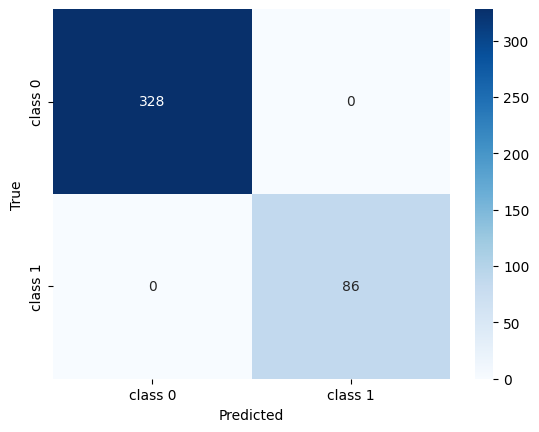

Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000021653263730>:
              precision    recall  f1-score   support

     class 0     1.0000    1.0000    1.0000       328
     class 1     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414




In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to class labels
Y_true = np.argmax(y_test, axis=1)

# Get the number of classes (number of unique class labels)
num_classes = len(np.unique(Y_true))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Define class labels based on your specific problem
class_labels = ['class 0', 'class 1']

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show the classification report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(Y_true, Y_pred_classes, target_names=class_labels, digits=4)))


Testing Privat Data

In [17]:
# Load dataset dari folder
normal_folder = "./privatData/Normal"
stone_folder = "./privatData/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_privat = X / 255.0
# Ubah label ke format one-hot encoding
y_privat = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 540, 1: 446})


In [18]:
from sklearn.metrics import f1_score, classification_report

# Prediksi menggunakan model
y_pred_probs = model.predict(X_privat)  # Gantilah x_test dengan data uji Anda
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi

# Konversi hasil prediksi menjadi bentuk yang sesuai
y_true = np.argmax(y_privat, axis=1)  # Gantilah y_test dengan label ground truth

# Hitung F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' untuk klasifikasi multiclass

print("F1 Scores:", f1)

# Print laporan klasifikasi
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

31/31 [==============================] - 4s 141ms/step
F1 Scores: 0.5090517274193485
Classification Report:
              precision    recall  f1-score   support

           0     0.6640    0.3111    0.4237       540
           1     0.4925    0.8094    0.6124       446

    accuracy                         0.5365       986
   macro avg     0.5783    0.5603    0.5180       986
weighted avg     0.5864    0.5365    0.5091       986



In [19]:
import math 
import pandas as pd

los, acc, pre, recall, sensitivity, specificity = model.evaluate(X_privat, y_privat, verbose=1)

print("Loss : ", los)
print("Acc : ", acc)
print("Precission : ", pre)
print("Recall : ", recall)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("G-mean : ", math.sqrt(sensitivity*specificity))
# print("F1-Score : ", ((2*(pre*recall))/pre+recall))

# Hitung G-mean
g_mean = math.sqrt(sensitivity * specificity)

# Buat dataframe dengan data evaluasi
evaluation_data = {
    'Loss': [los],
    'Accuracy': [acc],
    'Precision': [pre],
    'Recall': [recall],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'G-mean': [g_mean]
}

df = pd.DataFrame(evaluation_data)
df['f1_scores'] = f1
df['data'] = "original"
df['model'] = "CNN"
df['epoch'] = len(history.history['loss'])

# Tampilkan dataframe
print(df)

31/31 [==============================] - 5s 146ms/step - loss: 2.3638 - accuracy: 0.5365 - precision: 0.5365 - recall: 0.5365 - specificity_at_sensitivity: 1.0000 - sensitivity_at_specificity: 1.0000
Loss :  2.3637547492980957
Acc :  0.5365111827850342
Precission :  0.5365111827850342
Recall :  0.5365111827850342
Sensitivity :  1.0
Specificity :  1.0
G-mean :  1.0
       Loss  Accuracy  Precision    Recall  Sensitivity  Specificity  G-mean  \
0  2.363755  0.536511   0.536511  0.536511          1.0          1.0     1.0   

   f1_scores      data model  epoch  
0   0.509052  original   CNN     14  


31/31 [==============================] - 4s 141ms/step


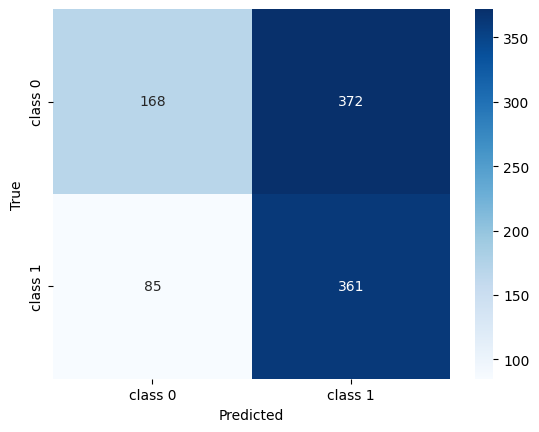

Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000021653263730>:
              precision    recall  f1-score   support

     class 0     0.6640    0.3111    0.4237       540
     class 1     0.4925    0.8094    0.6124       446

    accuracy                         0.5365       986
   macro avg     0.5783    0.5603    0.5180       986
weighted avg     0.5864    0.5365    0.5091       986




In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_privat)
# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to class labels
Y_true = np.argmax(y_privat, axis=1)

# Get the number of classes (number of unique class labels)
num_classes = len(np.unique(Y_true))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Define class labels based on your specific problem
class_labels = ['class 0', 'class 1']

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show the classification report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(Y_true, Y_pred_classes, target_names=class_labels, digits=4)))
